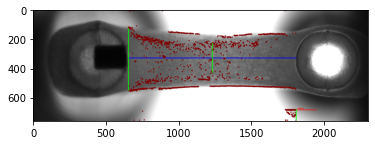

/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/search_image_4.tif
horizontal inner distance between rois: 1384.8 (microns)
vertical thickness at inner edge of left ROI : 511.2 (microns)
vertical thickness at midpoint between rois: 243.6 (microns)
vertical thickness at inner edge of right ROI : 87.6 (microns)
area between rois: 385726.8 (microns)



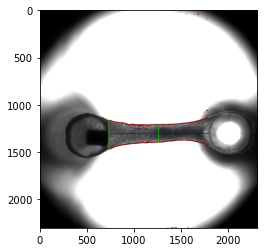

/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/search_image_3.tiff
horizontal inner distance between rois: 1260.0 (microns)
vertical thickness at inner edge of left ROI : 368.4 (microns)
vertical thickness at midpoint between rois: 224.4 (microns)
vertical thickness at inner edge of right ROI : 1.2 (microns)
area between rois: 277664.4 (microns)



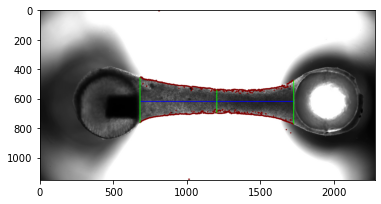

/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/search_image_1.jpg
horizontal inner distance between rois: 1252.8 (microns)
vertical thickness at inner edge of left ROI : 364.8 (microns)
vertical thickness at midpoint between rois: 184.8 (microns)
vertical thickness at inner edge of right ROI : 351.6 (microns)
area between rois: 234162.0 (microns)



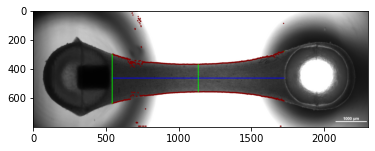

/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/search_image_2.jpg
horizontal inner distance between rois: 1420.8 (microns)
vertical thickness at inner edge of left ROI : 404.4 (microns)
vertical thickness at midpoint between rois: 225.6 (microns)
vertical thickness at inner edge of right ROI : 1.2 (microns)
area between rois: 337945.2 (microns)



In [1]:
from morphology import morphologyMetrics, resultsToCSV, contentsOfDir
import os
from datetime import datetime
from cv2 import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

# search_image_path:            Path to the image morphology metrics are to be computed for.
#                               if search_image_path does not exist, is "" or "select" (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#
# template_image_paths:         A list of 2 paths to templates that will be located in search_image. 
#                               These templates should have inner edges that form vertical end points of
#                               a sub region in search_image that will be analyzed i.e.
#                               the left template should have it's right vertical edge as the
#                               left most point in search_image to consider, and 
#                               the right template should have it's left vertical edge as the 
#                               right most point in search_image to consider.
#                               - If template_image_paths does not exist is None or "select (case is ignored),
#                               a small window will pop up allowing selection from the file system.
#                               - If template_image_paths is "draw", a small window will pop up, and
#                               you can manually select a ROIs. To draw the ROIs, draw the bounding box
#                               for the left most roi and then hit enter, then draw the bounding box for the
#                               right most roi and then hit enter, then hit ESC to complete the selection.
#

# directory_with_images = '../test_data/morphology/failing_edge_detection/'
# template_image_left = directory_with_images + 'template_image_left.tif'
# template_image_right = directory_with_images + 'template_image_right.tif'
# template_image_paths = [template_image_left, template_image_right]

template_image_paths = [
    '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/templates/template_image_1_left.jpg',  
    '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/templates/template_image_1_right.jpg'
]  # 'select'
directory_with_images = '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/multi_test/'  # 'select'
base_dir, test_files = contentsOfDir(dir_path=directory_with_images, search_terms=['.tif', '.tiff', '.jpg', '.png'])
results_dir_name = unique_name = "results_" + datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
results_dir = os.path.join(base_dir, results_dir_name)
os.mkdir(results_dir)
all_metrics = []
for file_name, file_extension in test_files:
    file_to_analyze = os.path.join(base_dir, file_name + file_extension)
    
    results_image, metrics = morphologyMetrics(
        search_image_path=file_to_analyze,
        template_image_paths=template_image_paths,
        sub_pixel_search_increment=None,
        sub_pixel_refinement_radius=None,
        microns_per_pixel=1.2
    )

    all_metrics.append(
        {
            'file': file_to_analyze,
            'horizontal_length': round(metrics['distance_between_rois'], 2),
            'left_edge_vertical_length': round(metrics['left_end_point_thickness'], 2),
            'mid_point_vertical_length': round(metrics['midpoint_thickness'], 2),
            'right_edge_vertical_length': round(metrics['right_end_point_thickness'], 2),
            'tissue_area': round(metrics['area_between_rois'], 2)
        }        
    )

    # write the results image to file
    analyzed_file_results_image_name = file_name + '_results.jpg'
    analyzed_file_results_image_path = os.path.join(results_dir, analyzed_file_results_image_name)
    cv.imwrite(analyzed_file_results_image_path, results_image)

    # display the results image here
    plt.imshow(cv.cvtColor(results_image, cv.COLOR_BGR2RGB))
    plt.show()

    # display the results metrics
    print(file_to_analyze)    
    print(f"horizontal inner distance between rois: {round(metrics['distance_between_rois'], 2)} (microns)")
    print(f"vertical thickness at inner edge of left ROI : {round(metrics['left_end_point_thickness'], 2)} (microns)")
    print(f"vertical thickness at midpoint between rois: {round(metrics['midpoint_thickness'], 2)} (microns)")
    print(f"vertical thickness at inner edge of right ROI : {round(metrics['right_end_point_thickness'], 2)} (microns)")
    print(f"area between rois: {round(metrics['area_between_rois'], 2)} (microns)")
    print()

results_xlsx_name = 'results.xlsx'
results_xlsx_path = os.path.join(results_dir, results_xlsx_name)
resultsToCSV(all_metrics, results_xlsx_path)